# Boston Flights

We have data on all domestic commercial flights to and from Boston in 2019, and from 2020 (at least through June I believe). Let us start by importing a few libraries and loading up the data. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# The 2019 data
df19 = pd.read_csv("data/boston2019.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (48,69,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# The 2020 data
df20 = pd.read_csv("data/boston2020.csv")

df20

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2020,1,1,9,4,2020-01-09,B6,N266JB,945,10721,...,728,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,1,10,5,2020-01-10,B6,N339JB,945,10721,...,728,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,12,7,2020-01-12,B6,N358JB,945,10721,...,728,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,13,1,2020-01-13,B6,N307JB,945,10721,...,728,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,14,2,2020-01-14,B6,N231JB,945,10721,...,728,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92651,2020,2,6,12,5,2020-06-12,AS,N285AK,275,10721,...,2496,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92652,2020,2,6,13,6,2020-06-13,AS,N461AS,12,14747,...,2496,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92653,2020,2,6,13,6,2020-06-13,AS,N287AK,273,10721,...,2496,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92654,2020,2,6,13,6,2020-06-13,AS,N494AS,274,14747,...,2496,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# So what is in these files? Let us read in the codebook.
codebook = pd.read_excel("data/airline_codebook.xlsx")

pd.set_option('display.max_rows', codebook.shape[0]+1, 'display.max_columns', 100)

codebook

,Variable,Description
0,Year,Year
1,Quarter,Quarter (1-4)
2,Month,Month
3,DayofMonth,Day of Month
4,DayOfWeek,Day of Week
5,FlightDate,Flight Date (yyyymmdd)
6,UniqueCarrier,Unique Carrier Code. When the same code has be...
7,AirlineID,An identification number assigned by US DOT to...
8,Carrier,Code assigned by IATA and commonly used to ide...
9,TailNum,Tail Number


There are too many columns in the data-frame, 109 to be precise. Let us only retain some of them. 

In [4]:
df19a = df19[['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'Origin',
 'OriginCityName',
 'OriginWac',
 'DestAirportID',
 'Dest',
 'DestCityName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 'LongestAddGTime']
]

In [7]:
df19a

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,Origin,OriginCityName,OriginWac,DestAirportID,Dest,DestCityName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2019,1,1,5,6,2019-01-05,OO,N276SY,3662,10721,BOS,"Boston, MA",13,12953,LGA,"New York, NY",22,1400,1356.0,-4.0,0.0,0.0,-1.0,1400-1459,12.0,1408.0,1457.0,9.0,1529,1506.0,-23.0,0.0,0.0,-2.0,1500-1559,0,NaN,0,89,70.0,49.0,1,184,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,5,6,2019-01-05,OO,N281SY,3916,10721,BOS,"Boston, MA",13,12478,JFK,"New York, NY",22,1145,1141.0,-4.0,0.0,0.0,-1.0,1100-1159,13.0,1154.0,1243.0,14.0,1306,1257.0,-9.0,0.0,0.0,-1.0,1300-1359,0,NaN,0,81,76.0,49.0,1,187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,5,6,2019-01-05,OO,N281SY,3923,10693,BNA,"Nashville, TN",54,10721,BOS,"Boston, MA",13,635,633.0,-2.0,0.0,0.0,-1.0,0600-0659,20.0,653.0,957.0,9.0,1009,1006.0,-3.0,0.0,0.0,-1.0,1000-1059,0,NaN,0,154,153.0,124.0,1,942,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,5,6,2019-01-05,OO,N291SY,4040,10721,BOS,"Boston, MA",13,12478,JFK,"New York, NY",22,1847,1838.0,-9.0,0.0,0.0,-1.0,1800-1859,14.0,1852.0,1946.0,15.0,2019,2001.0,-18.0,0.0,0.0,-2.0,2000-2059,0,NaN,0,92,83.0,54.0,1,187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,5,6,2019-01-05,OO,N291SY,4043,12478,JFK,"New York, NY",22,10721,BOS,"Boston, MA",13,1306,1306.0,0.0,0.0,0.0,0.0,1300-1359,27.0,1333.0,1418.0,7.0,1424,1425.0,1.0,1.0,0.0,0.0,1400-1459,0,NaN,0,78,79.0,45.0,1,187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301113,2019,4,12,22,7,2019-12-22,WN,N7720F,5619,10821,BWI,"Baltimore, MD",35,10721,BOS,"Boston, MA",13,2250,2305.0,15.0,15.0,1.0,1.0,2200-2259,19.0,2324.0,27.0,3.0,20,30.0,10.0,10.0,0.0,0.0,0001-0559,0,NaN,0,90,85.0,63.0,1,369,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301114,2019,4,12,22,7,2019-12-22,WN,N492WN,5997,10821,BWI,"Baltimore, MD",35,10721,BOS,"Boston, MA",13,1800,1844.0,44.0,44.0,1.0,2.0,1800-1859,15.0,1859.0,2005.0,3.0,1935,2008.0,33.0,33.0,1.0,2.0,1900-1959,0,NaN,0,95,84.0,66.0,1,369,2,7.0,0.0,0.0,0.0,26.0,NaN,NaN,NaN
301115,2019,4,12,22,7,2019-12-22,WN,N8541W,3986,11066,CMH,"Columbus, OH",44,10721,BOS,"Boston, MA",13,640,637.0,-3.0,0.0,0.0,-1.0,0600-0659,18.0,655.0,821.0,5.0,840,826.0,-14.0,0.0,0.0,-1.0,0800-0859,0,NaN,0,120,109.0,86.0,1,640,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301116,2019,4,12,22,7,2019-12-22,WN,N7863A,3998,11066,CMH,"Columbus, OH",44,10721,BOS,"Boston, MA",13,2055,2051.0,-4.0,0.0,0.0,-1.0,2000-2059,7.0,2058.0,2218.0,9.0,2240,2227.0,-13.0,0.0,0.0,-1.0,2200-2259,0,NaN,0,105,96.0,80.0,1,640,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# How many unique airlines report into this dataset

df19a['Reporting_Airline'].value_counts()

B6    107782
AA     51725
DL     36995
UA     27491
YX     22311
WN     20512
9E     10781
NK     10005
AS      5950
OO      4981
F9      1225
MQ       434
HA       420
EV       324
YV       132
OH        50
Name: Reporting_Airline, dtype: int64

Let us replace these airline codes with the actual name of the airline so that it is easier to do the analysis. We are going to do this in two phases ... first specifying the airline codes in `myconditions` and then specifying the airline names in `mylabels`. 

`'Airline'` is then created via `np.select(myconditions, myvalues)`


In [9]:
myconditions = [
    (df19a['Reporting_Airline'] == "B6"),
    (df19a['Reporting_Airline'] == "AA"),
    (df19a['Reporting_Airline'] == "DL"),
    (df19a['Reporting_Airline'] == "UA"),
    (df19a['Reporting_Airline'] == "YX"),
    (df19a['Reporting_Airline'] == "WN"),
    (df19a['Reporting_Airline'] == "9E"),
    (df19a['Reporting_Airline'] == "NK"),
    (df19a['Reporting_Airline'] == "AS"),
    (df19a['Reporting_Airline'] == "OO"),
    (df19a['Reporting_Airline'] == "F9"),
    (df19a['Reporting_Airline'] == "MQ"),
    (df19a['Reporting_Airline'] == "HA"),
    (df19a['Reporting_Airline'] == "EV"),
    (df19a['Reporting_Airline'] == "YV"),
    (df19a['Reporting_Airline'] == "OH")
]

myvalues = [
    "Jet Blue", "American Airlines", "Delta", "United Airlines", "Republic Airways", "Southwest Airlines",
    "Endeavor Air", "Spirit Airlines", "Alaska Airlines", "SkyWest Airlines", "Frontier Airlines",
    "Envoy Air", "Hawaiian Airlines", "ExpressJet", "Mesa Airlines", "PSA Airlines"
]

df19a['Airline'] = np.select(myconditions, myvalues)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
# Let us check if it worked.

df19a['Airline'].value_counts()

Jet Blue              107782
American Airlines      51725
Delta                  36995
United Airlines        27491
Republic Airways       22311
Southwest Airlines     20512
Endeavor Air           10781
Spirit Airlines        10005
Alaska Airlines         5950
SkyWest Airlines        4981
Frontier Airlines       1225
Envoy Air                434
Hawaiian Airlines        420
ExpressJet               324
Mesa Airlines            132
PSA Airlines              50
Name: Airline, dtype: int64

#### Question 1: How many unique airports do flights come from and go to?

We should exclude Boston since all flights depart from Boston and arrive in Boston. The key variables will be `OriginCityName` -- indicating where the flight originated, and `DestCityName` -- indicating where the flight was going to.

In [11]:
df19a[df19a.OriginCityName != "Boston, MA"]['OriginCityName'].value_counts()

New York, NY                      15806
Washington, DC                    10322
Chicago, IL                        9174
Philadelphia, PA                   7703
Atlanta, GA                        6325
Newark, NJ                         5736
Baltimore, MD                      5583
Los Angeles, CA                    5184
San Francisco, CA                  5048
Orlando, FL                        4342
Charlotte, NC                      4216
Raleigh/Durham, NC                 3882
Detroit, MI                        3562
Pittsburgh, PA                     3352
Denver, CO                         3348
Fort Lauderdale, FL                3132
Dallas/Fort Worth, TX              3094
Minneapolis, MN                    3010
Nashville, TN                      2935
Tampa, FL                          2684
Seattle, WA                        2298
Buffalo, NY                        2266
Houston, TX                        2263
Miami, FL                          2249
Richmond, VA                       2243


In [12]:
df19a[df19a.DestCityName != "Boston, MA"]['DestCityName'].value_counts()

New York, NY                      15749
Washington, DC                    10307
Chicago, IL                        9219
Philadelphia, PA                   7674
Atlanta, GA                        6340
Newark, NJ                         5745
Baltimore, MD                      5585
Los Angeles, CA                    5238
San Francisco, CA                  5053
Orlando, FL                        4343
Charlotte, NC                      4255
Raleigh/Durham, NC                 3881
Detroit, MI                        3562
Pittsburgh, PA                     3351
Denver, CO                         3279
Fort Lauderdale, FL                3145
Dallas/Fort Worth, TX              3095
Minneapolis, MN                    3009
Nashville, TN                      2944
Tampa, FL                          2683
Seattle, WA                        2299
Buffalo, NY                        2267
Houston, TX                        2266
Richmond, VA                       2244
Miami, FL                          2241


### Question 2: What proportion of the flights fly to the various destinations?

In [13]:
df19a[df19a.DestCityName != "Boston, MA"]['DestCityName'].value_counts(normalize = True)*100

New York, NY                      10.460004
Washington, DC                     6.845594
Chicago, IL                        6.122978
Philadelphia, PA                   5.096836
Atlanta, GA                        4.210834
Newark, NJ                         3.815653
Baltimore, MD                      3.709386
Los Angeles, CA                    3.478919
San Francisco, CA                  3.356048
Orlando, FL                        2.884488
Charlotte, NC                      2.826041
Raleigh/Durham, NC                 2.577641
Detroit, MI                        2.365771
Pittsburgh, PA                     2.225632
Denver, CO                         2.177811
Fort Lauderdale, FL                2.088813
Dallas/Fort Worth, TX              2.055604
Minneapolis, MN                    1.998486
Nashville, TN                      1.955315
Tampa, FL                          1.781966
Seattle, WA                        1.526925
Buffalo, NY                        1.505672
Houston, TX                     

### Question 3: How many unique airplanes are there? 

In [14]:
df19a['Tail_Number'].nunique() # 4023 it seems = There are 4023 unique aircraft that flew to/from Boston in 2019.

4023

### Question 4: How many flights departed per day?

In [15]:
df19a['FlightDate'] = df19a['FlightDate'].astype('datetime64[ns]')

df19a['FlightDate'].value_counts()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2019-10-04    966
2019-10-18    965
2019-12-02    964
2019-11-22    963
2019-10-25    962
             ... 
2019-01-12    507
2019-01-26    505
2019-02-09    503
2019-02-02    494
2019-01-19    491
Name: FlightDate, Length: 365, dtype: int64

If we plotted these, as a line chart, what would we see?

In [16]:
tab1 = df19a['FlightDate'].value_counts()

tab1

2019-10-04    966
2019-10-18    965
2019-12-02    964
2019-11-22    963
2019-10-25    962
             ... 
2019-01-12    507
2019-01-26    505
2019-02-09    503
2019-02-02    494
2019-01-19    491
Name: FlightDate, Length: 365, dtype: int64

<AxesSubplot:>

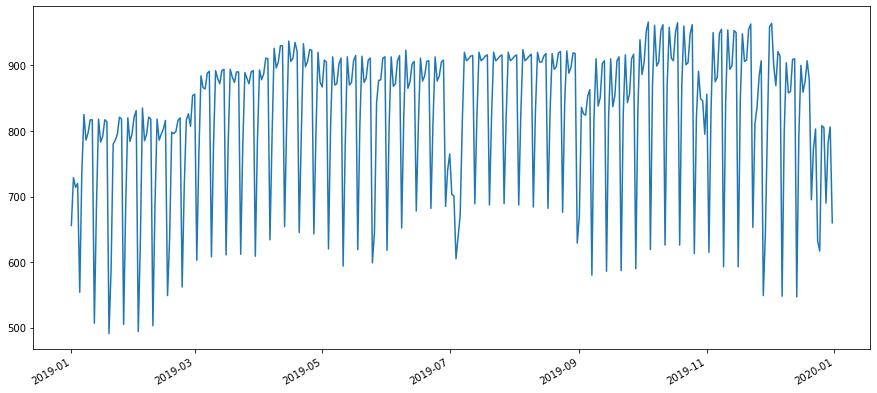

In [17]:
plt.figure(figsize = (15, 7))

tab1.plot() # A simple time-series plot. 

<AxesSubplot:ylabel='FlightDate'>

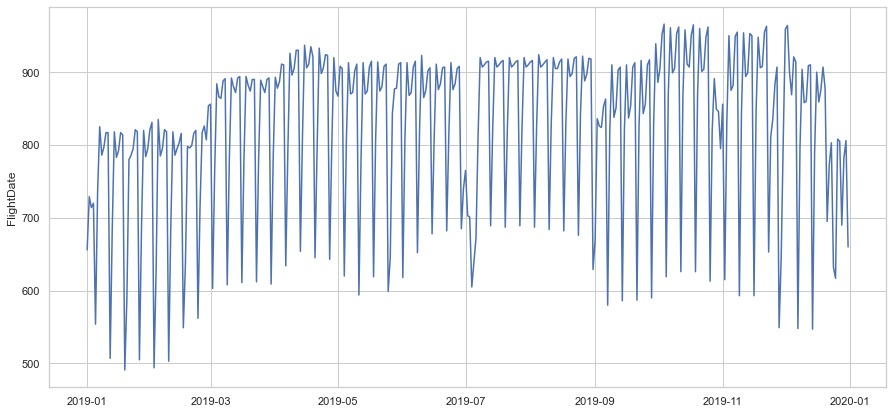

In [18]:
# Now with seaborn, but before do that let us set a style for the seaborn canvas

sns.set_theme(style = "whitegrid") 

plt.figure(figsize = (15, 7))

sns.lineplot(data = tab1, linewidth = 1.5)

### How many flights per month? 

In [19]:
import calendar

df19a['Month'] = df19a['Month'].apply(lambda x: calendar.month_abbr[x])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
tab2 = df19a['Month'].value_counts(sort = False)
tab2

Dec    25141
Apr    25824
Nov    25213
Mar    25459
Aug    26745
May    26007
Sep    24722
Jun    25221
Feb    21013
Jul    25864
Oct    27050
Jan    22859
Name: Month, dtype: int64

In [21]:
df19a['Month'].value_counts()

Oct    27050
Aug    26745
May    26007
Jul    25864
Apr    25824
Mar    25459
Jun    25221
Nov    25213
Dec    25141
Sep    24722
Jan    22859
Feb    21013
Name: Month, dtype: int64

In [22]:
df19a = df19a.sort_values(by = "FlightDate")

Let us make sure that the Months show up in order so we will specify the proper order, and then specify that Month should follow a specific order. This is being done with `pd.Categorical(...)`

In [23]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

df19a['Month'] = pd.Categorical(df19a['Month'], categories = months, ordered = True)

tab2 = df19a['Month'].value_counts(sort = False).reset_index()

tab2.columns = ['Month', 'Number of Flights']

tab2

,Month,Number of Flights
0,Jan,22859
1,Feb,21013
2,Mar,25459
3,Apr,25824
4,May,26007
5,Jun,25221
6,Jul,25864
7,Aug,26745
8,Sep,24722
9,Oct,27050


<AxesSubplot:xlabel='Month', ylabel='Number of Flights'>

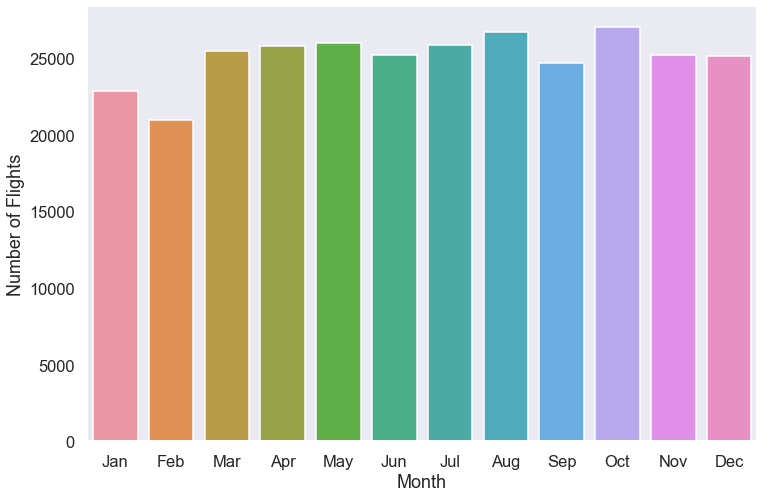

In [24]:
sns.set_theme(style = "dark") 

sns.set_context("talk")

plt.figure(figsize = (12, 8))

sns.barplot(data = tab2, x = 'Month', y = 'Number of Flights')

Okay, not much going on here. How about doing two new things: (1) Number of flights by `day of the week`, and then (ii) by `Month` and `day of the week`

In [70]:
df19a.dtypes

Year                                        int64
Quarter                                     int64
Month                                    category
DayofMonth                                  int64
DayOfWeek                                   int64
FlightDate                         datetime64[ns]
Reporting_Airline                          object
Tail_Number                                object
Flight_Number_Reporting_Airline             int64
OriginAirportID                             int64
Origin                                     object
OriginCityName                             object
OriginWac                                   int64
DestAirportID                               int64
Dest                                       object
DestCityName                               object
DestWac                                     int64
CRSDepTime                                  int64
DepTime                                   float64
DepDelay                                  float64


In [25]:
import datetime as dt

df19a['Weekday'] = df19a[['FlightDate']].apply(lambda x: dt.datetime.strftime(x['FlightDate'], '%A'), axis = 1)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df19a['Weekday'] = pd.Categorical(df19a['Weekday'], categories = days, ordered = True)

df19a['Weekday'].value_counts(sort = False)

Monday       46397
Tuesday      45105
Wednesday    44702
Thursday     45750
Friday       46059
Saturday     32196
Sunday       40909
Name: Weekday, dtype: int64

So Mondays have the most flights, followed by Friday, and Saturday has the least number of flights.

In [26]:
# Now weekday by month

tab3 = df19a.groupby(['Month'])['Weekday'].value_counts(sort = False).unstack()

#tab3 = tab3.reset_index()

#tab3.columns = ['Month', 'Weekday', 'Number of Flights']

tab3

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Month,,,,,,,
Jan,3243,3795,3908,3990,3169,2057,2697
Feb,3268,3193,3196,3294,3285,2108,2669
Mar,3559,3508,3482,3560,4423,3043,3884
Apr,4609,4452,3609,3700,3684,2576,3194
May,3583,3491,4371,4536,4555,2432,3039
Jun,3660,3485,3515,3620,3636,3315,3990
Jul,4445,4331,4341,3347,3386,2737,3277
Aug,3684,3594,3610,4580,4590,3358,3329
Sep,4511,3344,3385,3573,3600,2343,3966


Let us plot this as a series of heatmap. Once we have it up and running I'll explain what we are looking at.

<AxesSubplot:xlabel='Weekday', ylabel='Month'>

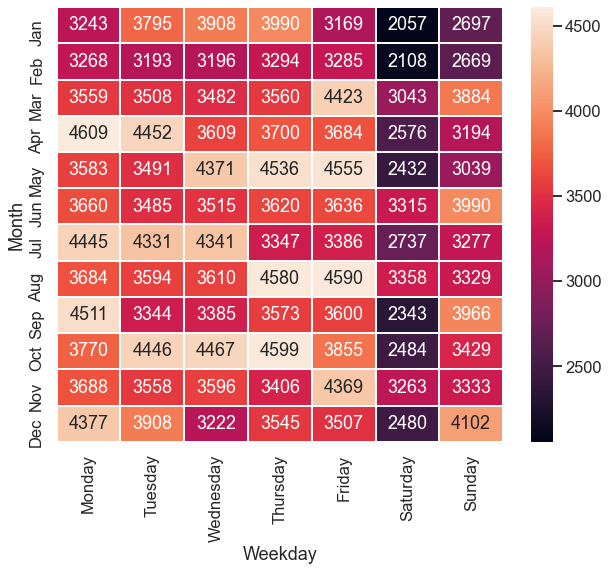

In [27]:
f, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(tab3, annot = True, fmt = "d", linewidths = 1, ax = ax)

Fewest flights tend to be on Saturdays. But that is about the only pattern we can pick up here.

In [28]:
import plotnine as p9

from plotnine import *

In [29]:
tab1 = df19a['FlightDate'].value_counts().reset_index()

In [30]:
tab1.columns = ['Date', 'Number of Flights']

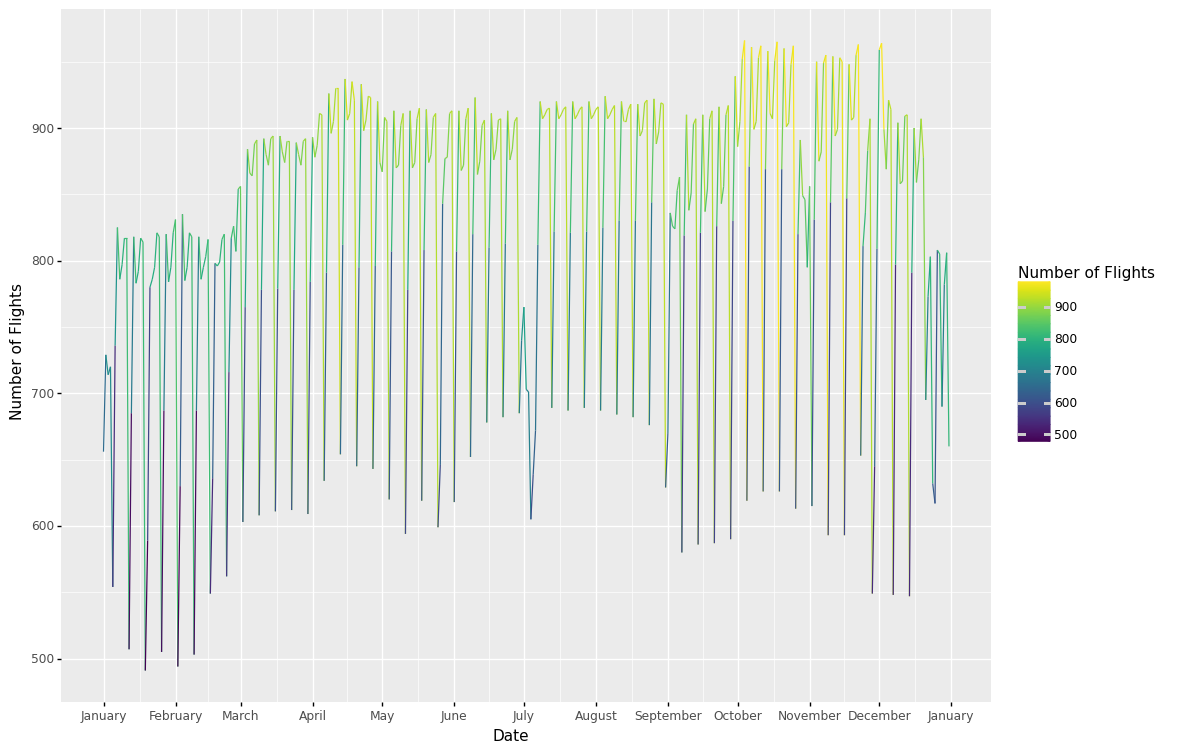

<ggplot: (8776910058657)>

In [31]:
p9.options.figure_size = (12, 9)

(
    ggplot(data = tab1)
    + aes(x = 'Date', y = 'Number of Flights', color = 'Number of Flights') 
    + geom_line()
    + labs(x = "Date")
    + scale_x_date(date_breaks = "1 month", date_labels = "%B")
)

### What if we want to fly to Minneapolis? What are our options?

In [32]:
df_mn = df19a[ df19a['DestCityName'] == "Minneapolis, MN" ]

In [33]:
df_mn

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,Origin,OriginCityName,OriginWac,DestAirportID,Dest,DestCityName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,Airline,Weekday
13429,2019,1,Jan,1,2,2019-01-01,B6,N179JB,1735,10721,BOS,"Boston, MA",13,13487,MSP,"Minneapolis, MN",63,1425,1417.0,-8.0,0.0,0.0,-1.0,1400-1459,19.0,1436.0,1655.0,4.0,1659,1659.0,0.0,0.0,0.0,0.0,1600-1659,0,NaN,0,214,222.0,199.0,1,1124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jet Blue,Tuesday
13455,2019,1,Jan,1,2,2019-01-01,B6,N621JB,2235,10721,BOS,"Boston, MA",13,13487,MSP,"Minneapolis, MN",63,2041,2231.0,110.0,110.0,1.0,7.0,2000-2059,14.0,2245.0,53.0,6.0,2312,59.0,107.0,107.0,1.0,7.0,2300-2359,0,NaN,0,211,208.0,188.0,1,1124,5,4.0,0.0,0.0,0.0,103.0,NaN,NaN,NaN,Jet Blue,Tuesday
17959,2019,1,Jan,1,2,2019-01-01,DL,N367NW,2588,10721,BOS,"Boston, MA",13,13487,MSP,"Minneapolis, MN",63,1131,1128.0,-3.0,0.0,0.0,-1.0,1100-1159,19.0,1147.0,1351.0,4.0,1355,1355.0,0.0,0.0,0.0,0.0,1300-1359,0,NaN,0,204,207.0,184.0,1,1124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta,Tuesday
17913,2019,1,Jan,1,2,2019-01-01,DL,N352DN,809,10721,BOS,"Boston, MA",13,13487,MSP,"Minneapolis, MN",63,540,540.0,0.0,0.0,0.0,0.0,0001-0559,12.0,552.0,809.0,3.0,808,812.0,4.0,4.0,0.0,0.0,0800-0859,0,NaN,0,208,212.0,197.0,1,1124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta,Tuesday
17935,2019,1,Jan,1,2,2019-01-01,DL,N359NW,1709,10721,BOS,"Boston, MA",13,13487,MSP,"Minneapolis, MN",63,1847,1840.0,-7.0,0.0,0.0,-1.0,1800-1859,12.0,1852.0,2102.0,5.0,2122,2107.0,-15.0,0.0,0.0,-1.0,2100-2159,0,NaN,0,215,207.0,190.0,1,1124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295990,2019,4,Dec,31,2,2019-12-31,DL,N335DN,2542,10721,BOS,"Boston, MA",13,13487,MSP,"Minneapolis, MN",63,1130,1126.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1140.0,1315.0,5.0,1349,1320.0,-29.0,0.0,0.0,-2.0,1300-1359,0,NaN,0,199,174.0,155.0,1,1124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta,Tuesday
293694,2019,4,Dec,31,2,2019-12-31,B6,N187JB,1735,10721,BOS,"Boston, MA",13,13487,MSP,"Minneapolis, MN",63,1627,1623.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1641.0,1819.0,10.0,1900,1829.0,-31.0,0.0,0.0,-2.0,1900-1959,0,NaN,0,213,186.0,158.0,1,1124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jet Blue,Tuesday
295985,2019,4,Dec,31,2,2019-12-31,DL,N332DN,2216,10721,BOS,"Boston, MA",13,13487,MSP,"Minneapolis, MN",63,610,607.0,-3.0,0.0,0.0,-1.0,0600-0659,23.0,630.0,807.0,6.0,844,813.0,-31.0,0.0,0.0,-2.0,0800-0859,0,NaN,0,214,186.0,157.0,1,1124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta,Tuesday
295986,2019,4,Dec,31,2,2019-12-31,DL,N378NW,2339,10721,BOS,"Boston, MA",13,13487,MSP,"Minneapolis, MN",63,1639,1632.0,-7.0,0.0,0.0,-1.0,1600-1659,18.0,1650.0,1824.0,4.0,1910,1828.0,-42.0,0.0,0.0,-2.0,1900-1959,0,NaN,0,211,176.0,154.0,1,1124,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta,Tuesday


In [34]:
df_mn['Weekday'].value_counts()

Tuesday      459
Wednesday    457
Monday       456
Friday       455
Thursday     454
Sunday       428
Saturday     300
Name: Weekday, dtype: int64

In [35]:
df_mn['Airline'].value_counts()

Delta       1990
Jet Blue    1019
Name: Airline, dtype: int64

In [36]:
df_mn.groupby('Airline')['Weekday'].value_counts()

Airline   Weekday  
Delta     Monday       305
          Tuesday      305
          Wednesday    304
          Friday       304
          Thursday     303
          Sunday       278
          Saturday     191
Jet Blue  Tuesday      154
          Wednesday    153
          Monday       151
          Thursday     151
          Friday       151
          Sunday       150
          Saturday     109
Name: Weekday, dtype: int64

In [37]:
tab4 = df_mn.groupby(['Airline', 'DepTimeBlk'])['Weekday'].value_counts(sort = False).unstack()

tab4

Weekday              Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
Airline  DepTimeBlk                                                           
Delta    0001-0559     33.0     35.0       35.0      35.0    35.0      12.0   
         0600-0659     17.0     16.0       16.0      17.0    17.0       8.0   
         0700-0759     14.0     14.0       15.0      15.0    15.0      13.0   
         0800-0859     36.0     36.0       36.0      35.0    34.0      22.0   
         1000-1059      NaN      NaN        NaN       NaN     1.0       NaN   
         1100-1159     52.0     53.0       51.0      52.0    51.0      52.0   
         1200-1259      NaN      NaN        1.0       NaN     1.0       NaN   
         1400-1459     52.0     52.0       51.0      49.0    49.0      28.0   
         1600-1659     52.0     50.0       50.0      51.0    52.0      52.0   
         1800-1859     48.0     49.0       49.0      49.0    49.0       2.0   
         1900-1959      1.0      NaN        NaN       NaN     NaN       2.0   
Jet Blue 0600-0659     38.0     39.0       40.0      39.0    38.0      16.0   
         0700-0759     10.0     10.0        9.0      10.0    10.0       NaN   
         1400-1459     42.0     43.0       43.0      42.0    43.0      42.0   
         1500-1559      NaN      NaN        NaN       1.0     NaN       1.0   
         1600-1659     10.0     10.0        9.0       9.0     9.0       6.0   
         1900-1959      7.0      7.0        8.0       8.0     8.0       NaN   
         2000-2059     12.0     12.0       12.0      12.0    12.0      13.0   
         2100-2159     25.0     26.0       26.0      24.0    24.0      24.0   
         2200-2259      7.0      7.0        6.0       6.0     7.0       7.0   

Weekday              Sunday  
Airline  DepTimeBlk          
Delta    0001-0559     18.0  
         0600-0659     13.0  
         0700-0759     14.0  
         0800-0859     34.0  
         1000-1059      NaN  
         1100-1159     52.0  
         1200-1259      NaN  
         1400-1459     48.0  
         1600-1659     52.0  
         1800-1859     46.0  
         1900-1959      1.0  
Jet Blue 0600-0659     36.0  
         0700-0759     10.0  
         1400-1459     42.0  
         1500-1559      NaN  
         1600-1659     10.0  
         1900-1959      7.0  
         2000-2059     13.0  
         2100-2159     25.0  
         2200-2259      7.0

In [38]:
df_ord = df19a[ df19a['DestCityName'] == "Chicago, IL" ]

df_ord

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,Origin,OriginCityName,OriginWac,DestAirportID,Dest,DestCityName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,Airline,Weekday
13427,2019,1,Jan,1,2,2019-01-01,B6,N187JB,1711,10721,BOS,"Boston, MA",13,13930,ORD,"Chicago, IL",41,1232,1233.0,1.0,1.0,0.0,0.0,1200-1259,17.0,1250.0,1438.0,21.0,1433,1459.0,26.0,26.0,1.0,1.0,1400-1459,0,NaN,0,181,206.0,168.0,1,867,4,1.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,Jet Blue,Tuesday
13367,2019,1,Jan,1,2,2019-01-01,B6,N198JB,1011,10721,BOS,"Boston, MA",13,13930,ORD,"Chicago, IL",41,1652,1651.0,-1.0,0.0,0.0,-1.0,1600-1659,16.0,1707.0,1904.0,32.0,1900,1936.0,36.0,36.0,1.0,2.0,1900-1959,0,NaN,0,188,225.0,177.0,1,867,4,0.0,0.0,36.0,0.0,0.0,NaN,NaN,NaN,Jet Blue,Tuesday
13232,2019,1,Jan,1,2,2019-01-01,B6,N284JB,111,10721,BOS,"Boston, MA",13,13930,ORD,"Chicago, IL",41,651,726.0,35.0,35.0,1.0,2.0,0600-0659,14.0,740.0,928.0,18.0,847,946.0,59.0,59.0,1.0,3.0,0800-0859,0,NaN,0,176,200.0,168.0,1,867,4,35.0,0.0,24.0,0.0,0.0,NaN,NaN,NaN,Jet Blue,Tuesday
21457,2019,1,Jan,1,2,2019-01-01,UA,N464UA,599,10721,BOS,"Boston, MA",13,13930,ORD,"Chicago, IL",41,1613,1611.0,-2.0,0.0,0.0,-1.0,1600-1659,12.0,1623.0,1756.0,13.0,1808,1809.0,1.0,1.0,0.0,0.0,1800-1859,0,NaN,0,175,178.0,153.0,1,867,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Airlines,Tuesday
21449,2019,1,Jan,1,2,2019-01-01,UA,N491UA,775,10721,BOS,"Boston, MA",13,13930,ORD,"Chicago, IL",41,825,822.0,-3.0,0.0,0.0,-1.0,0800-0859,12.0,834.0,1005.0,27.0,1020,1032.0,12.0,12.0,0.0,0.0,1000-1059,0,NaN,0,175,190.0,151.0,1,867,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Airlines,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276851,2019,4,Dec,31,2,2019-12-31,AA,N968AN,1509,10721,BOS,"Boston, MA",13,13930,ORD,"Chicago, IL",41,700,653.0,-7.0,0.0,0.0,-1.0,0700-0759,25.0,718.0,831.0,23.0,910,854.0,-16.0,0.0,0.0,-2.0,0900-0959,0,NaN,0,190,181.0,133.0,1,867,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines,Tuesday
284326,2019,4,Dec,31,2,2019-12-31,UA,N1902U,1251,10721,BOS,"Boston, MA",13,13930,ORD,"Chicago, IL",41,1000,1014.0,14.0,14.0,0.0,0.0,1000-1059,14.0,1028.0,1139.0,9.0,1200,1148.0,-12.0,0.0,0.0,-1.0,1200-1259,0,NaN,0,180,154.0,131.0,1,867,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Airlines,Tuesday
293509,2019,4,Dec,31,2,2019-12-31,B6,N304JB,211,10721,BOS,"Boston, MA",13,13930,ORD,"Chicago, IL",41,2251,2344.0,53.0,53.0,1.0,3.0,2200-2259,20.0,4.0,112.0,6.0,46,118.0,32.0,32.0,1.0,2.0,0001-0559,0,NaN,0,175,154.0,128.0,1,867,4,32.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Jet Blue,Tuesday
293627,2019,4,Dec,31,2,2019-12-31,B6,N231JB,1011,10721,BOS,"Boston, MA",13,13930,ORD,"Chicago, IL",41,1850,1845.0,-5.0,0.0,0.0,-1.0,1800-1859,17.0,1902.0,2012.0,8.0,2058,2020.0,-38.0,0.0,0.0,-2.0,2000-2059,0,NaN,0,188,155.0,130.0,1,867,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jet Blue,Tuesday


In [39]:
df_ord['Airline'].value_counts()

United Airlines       2804
American Airlines     2731
Jet Blue              1578
Southwest Airlines    1518
Republic Airways       391
Spirit Airlines        196
Delta                    1
Name: Airline, dtype: int64

In [ ]:
delays = df_ord.groupby(['Airline', 'Weekday'])['DepDelay'].aggregate(['mean', 'median']).unstack()

In [50]:
delays

<AxesSubplot:xlabel='Airline,Month', ylabel='Month'>

<AxesSubplot:xlabel='Airline'>

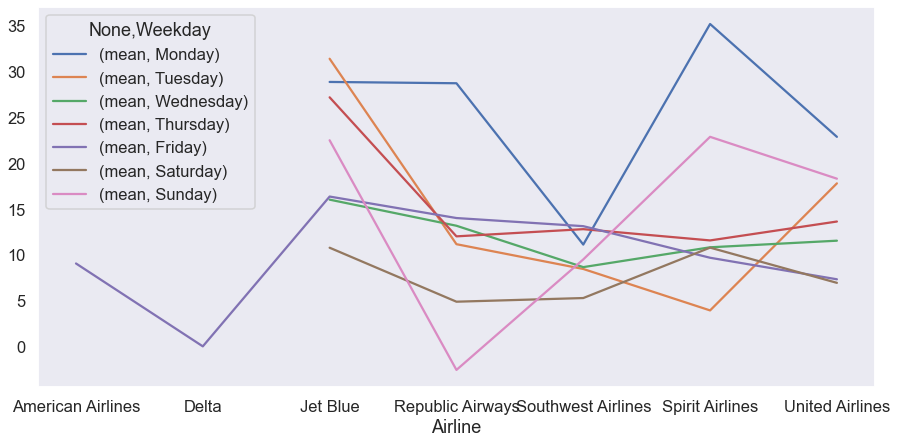

In [52]:
delays = df_ord.groupby(['Airline', 'Weekday'])['DepDelay'].aggregate(['mean']).unstack()


fig, ax = plt.subplots(figsize=(15,7))

delays.plot(ax = ax)

Not very helpful so why don't we focus only on the major airlines operating to ORD?

In [54]:
mylist = ['United Airlines', 'American Airlines', 'Jet Blue', 'Southwest Airlines']

mydf = df_ord[ df_ord['Airline'].isin(mylist)]

<AxesSubplot:xlabel='Weekday'>

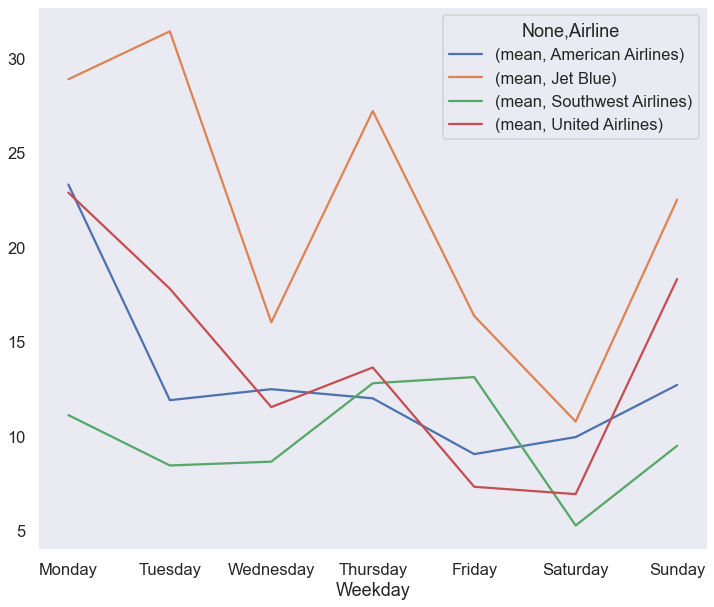

In [59]:
delays = mydf.groupby(['Weekday', 'Airline'])['DepDelay'].aggregate(['mean']).unstack()

fig, ax = plt.subplots(figsize = (12, 10))

delays.plot(ax = ax)

<AxesSubplot:xlabel='Weekday', ylabel='DepDelay'>

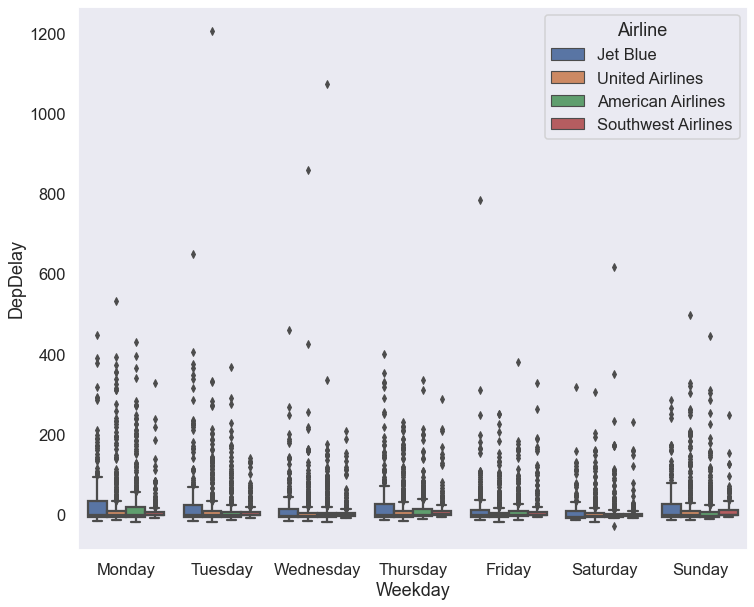

In [62]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12, 10))

sns.boxplot(x = "Weekday", y = "DepDelay",
            hue = "Airline", 
            data = mydf)

In [63]:
mydf2 = mydf[ mydf['DepDelay'] < 200 ]

<AxesSubplot:xlabel='Weekday', ylabel='DepDelay'>

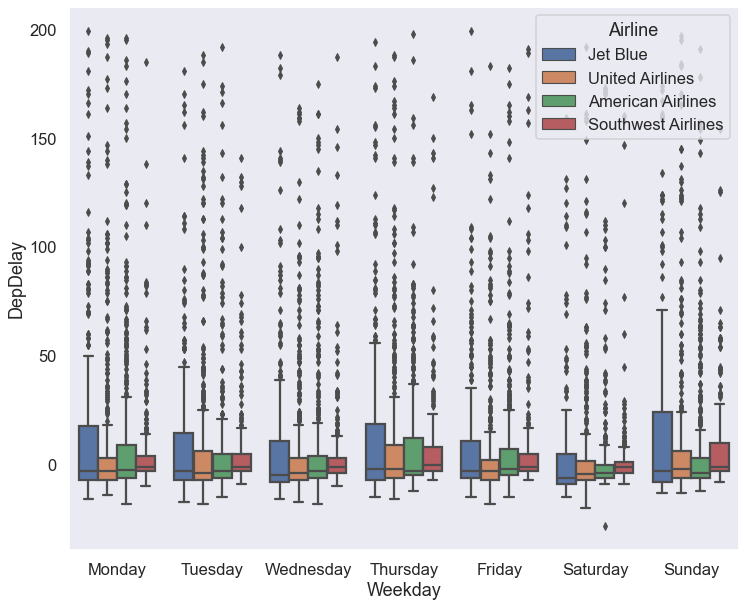

In [64]:
fig, ax = plt.subplots(figsize = (12, 10))

sns.boxplot(x = "Weekday", y = "DepDelay",
            hue = "Airline", 
            data = mydf2)

In [65]:
mydf3 = mydf[ mydf['Month'] == "Apr" ]

<AxesSubplot:xlabel='Weekday', ylabel='DepDelay'>

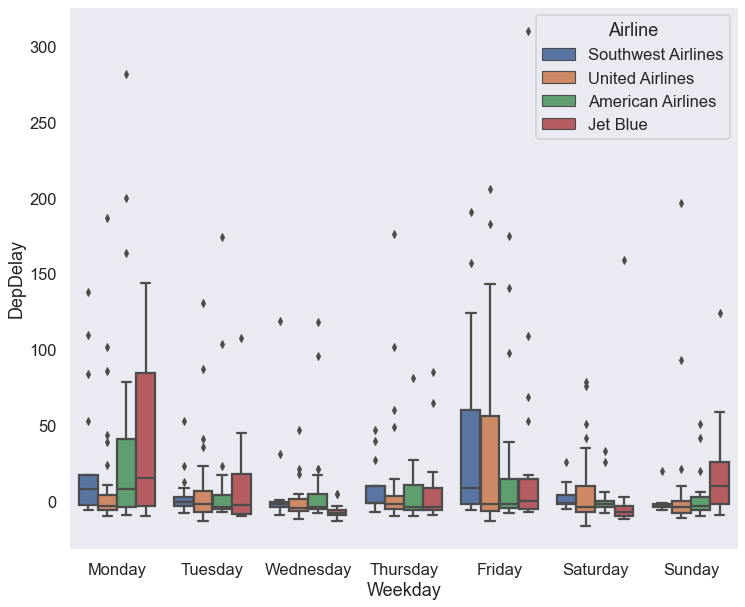

In [66]:
fig, ax = plt.subplots(figsize = (12, 10))

sns.boxplot(x = "Weekday", y = "DepDelay",
            hue = "Airline", 
            data = mydf3)

In [67]:
tab1 = df19a['FlightDate'].value_counts()
tab1

2019-10-04    966
2019-10-18    965
2019-12-02    964
2019-11-22    963
2019-10-25    962
             ... 
2019-01-12    507
2019-01-26    505
2019-02-09    503
2019-02-02    494
2019-01-19    491
Name: FlightDate, Length: 365, dtype: int64

<AxesSubplot:>

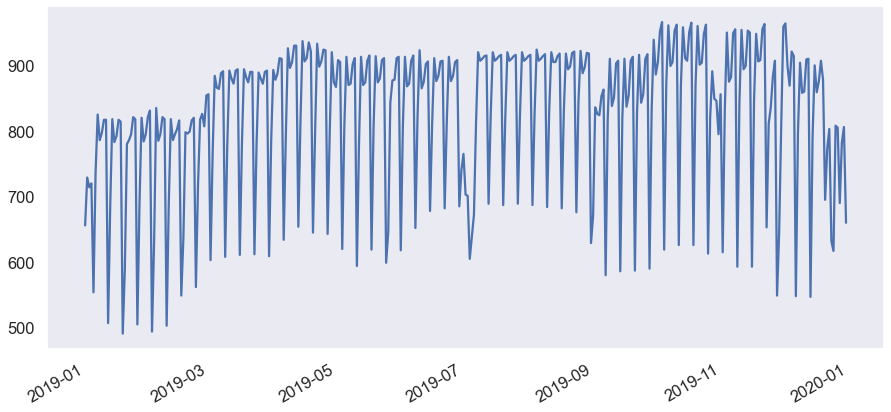

In [69]:
plt.figure(figsize = (15, 7))

tab1.plot()